# Fish AI

Real time fish counter and identification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cv2
from darkflow.net.build import TFNet
import glob

# %config InlineBackend.figure_format = 'svg'

/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dty

In [2]:
options = {
    'model': 'cfg/tiny-yolo-voc-3c.cfg',
#     'load': 'bin/tiny-yolo-voc.weights',
    'load': 1350,
    'thresh': 0.2,
    'gpu': 0
}

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-3c.cfg
Loading None ...
Finished in 6.031990051269531e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 2

In [3]:
!ls test/images/fish_vid_03*.jpg

test/images/fish_vid_03_0350.jpg  test/images/fish_vid_03_0407.jpg
test/images/fish_vid_03_0351.jpg  test/images/fish_vid_03_0408.jpg
test/images/fish_vid_03_0352.jpg  test/images/fish_vid_03_0409.jpg
test/images/fish_vid_03_0353.jpg  test/images/fish_vid_03_0410.jpg
test/images/fish_vid_03_0354.jpg  test/images/fish_vid_03_0411.jpg
test/images/fish_vid_03_0355.jpg  test/images/fish_vid_03_0412.jpg
test/images/fish_vid_03_0356.jpg  test/images/fish_vid_03_0413.jpg
test/images/fish_vid_03_0357.jpg  test/images/fish_vid_03_0414.jpg
test/images/fish_vid_03_0358.jpg  test/images/fish_vid_03_0415.jpg
test/images/fish_vid_03_0359.jpg  test/images/fish_vid_03_0416.jpg
test/images/fish_vid_03_0360.jpg  test/images/fish_vid_03_0417.jpg
test/images/fish_vid_03_0361.jpg  test/images/fish_vid_03_0418.jpg
test/images/fish_vid_03_0362.jpg  test/images/fish_vid_03_0419.jpg
test/images/fish_vid_03_0363.jpg  test/images/fish_vid_03_0420.jpg
test/images/fish_vid_03_0364.jpg  test/images/fish_vid_03_0421

[{'label': 'damselfish',
  'confidence': 0.5773898,
  'topleft': {'x': 41, 'y': 78},
  'bottomright': {'x': 132, 'y': 163}},
 {'label': 'damselfish',
  'confidence': 0.68141824,
  'topleft': {'x': 333, 'y': 86},
  'bottomright': {'x': 421, 'y': 194}},
 {'label': 'damselfish',
  'confidence': 0.56737643,
  'topleft': {'x': 308, 'y': 92},
  'bottomright': {'x': 387, 'y': 155}},
 {'label': 'damselfish',
  'confidence': 0.6185659,
  'topleft': {'x': 483, 'y': 84},
  'bottomright': {'x': 585, 'y': 169}},
 {'label': 'damselfish',
  'confidence': 0.52359253,
  'topleft': {'x': 440, 'y': 82},
  'bottomright': {'x': 543, 'y': 149}},
 {'label': 'damselfish',
  'confidence': 0.77356833,
  'topleft': {'x': 299, 'y': 175},
  'bottomright': {'x': 429, 'y': 256}},
 {'label': 'damselfish',
  'confidence': 0.67039585,
  'topleft': {'x': 191, 'y': 344},
  'bottomright': {'x': 300, 'y': 414}},
 {'label': 'damselfish',
  'confidence': 0.53813994,
  'topleft': {'x': 618, 'y': 482},
  'bottomright': {'x': 7

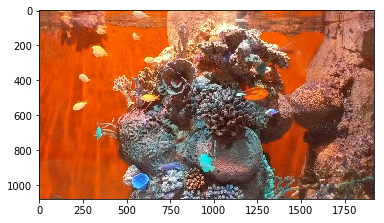

In [4]:
img = cv2.imread('test/images/fish_vid_03_0360.jpg', cv2.IMREAD_COLOR)
plt.imshow(img)
result = tfnet.return_predict(img)
result

In [5]:
# tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
# br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
# label = result[0]['label']

# tl, br, label

In [6]:
vid_name = 'fish_vid_03_predicted'

In [16]:
n = 0
counts_list = {'damselfish':[0], 'blue tang surgeonfish':[0], 'saddle butterfly fish':[0], 'total':[0]}

for path in sorted(glob.glob('test/images/fish_vid_03*.jpg')):

    img = cv2.imread(path, cv2.IMREAD_COLOR)
    result = tfnet.return_predict(img)

    img2 = img

    counts = {'damselfish':0, 'blue tang surgeonfish':0, 'saddle butterfly fish':0, 'total':0}

    for i in range(len(result)):

        tl = (result[i]['topleft']['x'], result[i]['topleft']['y'])
        br = (result[i]['bottomright']['x'], result[i]['bottomright']['y'])
        label = result[i]['label']

        counts[label] += 1

        if label == 'damselfish':
            color = (255, 255, 0) # cyan BGR
        elif label == 'blue tang surgeonfish':
            color = (255, 0, 0) # blue BGR
        elif label == 'saddle butterfly fish':
            color = (0, 255, 255) # BGR

        img2 = cv2.rectangle(img2, tl, br, color, 2)
        img2 = cv2.putText(img2, label, tl, fontFace = cv2.FONT_HERSHEY_COMPLEX, 
                       fontScale = 0.5, color = color, thickness=2)
        
    counts['total'] = np.sum([i for i in counts.values()])

    for item in counts.keys():
        counts_list[item] += [counts[item]]

    # show the max counts
    counts_max = {k:max(v) for k, v in counts_list.items()}

    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 15))
    s = '\n'.join([key + ":  " + str(val) for key, val in counts_max.items()])
    plt.text(x=1300, y=150, s=s, fontsize=18, color='white')
    plt.imshow(img2)
    plt.tight_layout()
    plt.savefig(f'prediction/images/{vid_name+str(n).zfill(4)}.jpg')
    
    plt.clf()
    print(n)
    n += 1
#     plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112


<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [17]:
# turn to video
source = f'prediction/images/{vid_name}*.jpg'
destination = 'prediction/videos/'

img_array = []
for filename in sorted(glob.glob(source)):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter(f'{destination}{vid_name}.mp4', fourcc, 15.0, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()